In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv("/content/drive/MyDrive/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [34]:
df.drop('CUST_ID',axis=1, inplace=True)

In [35]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [36]:
df.dropna(subset= ['CREDIT_LIMIT'], inplace=True)

In [37]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [39]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [40]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

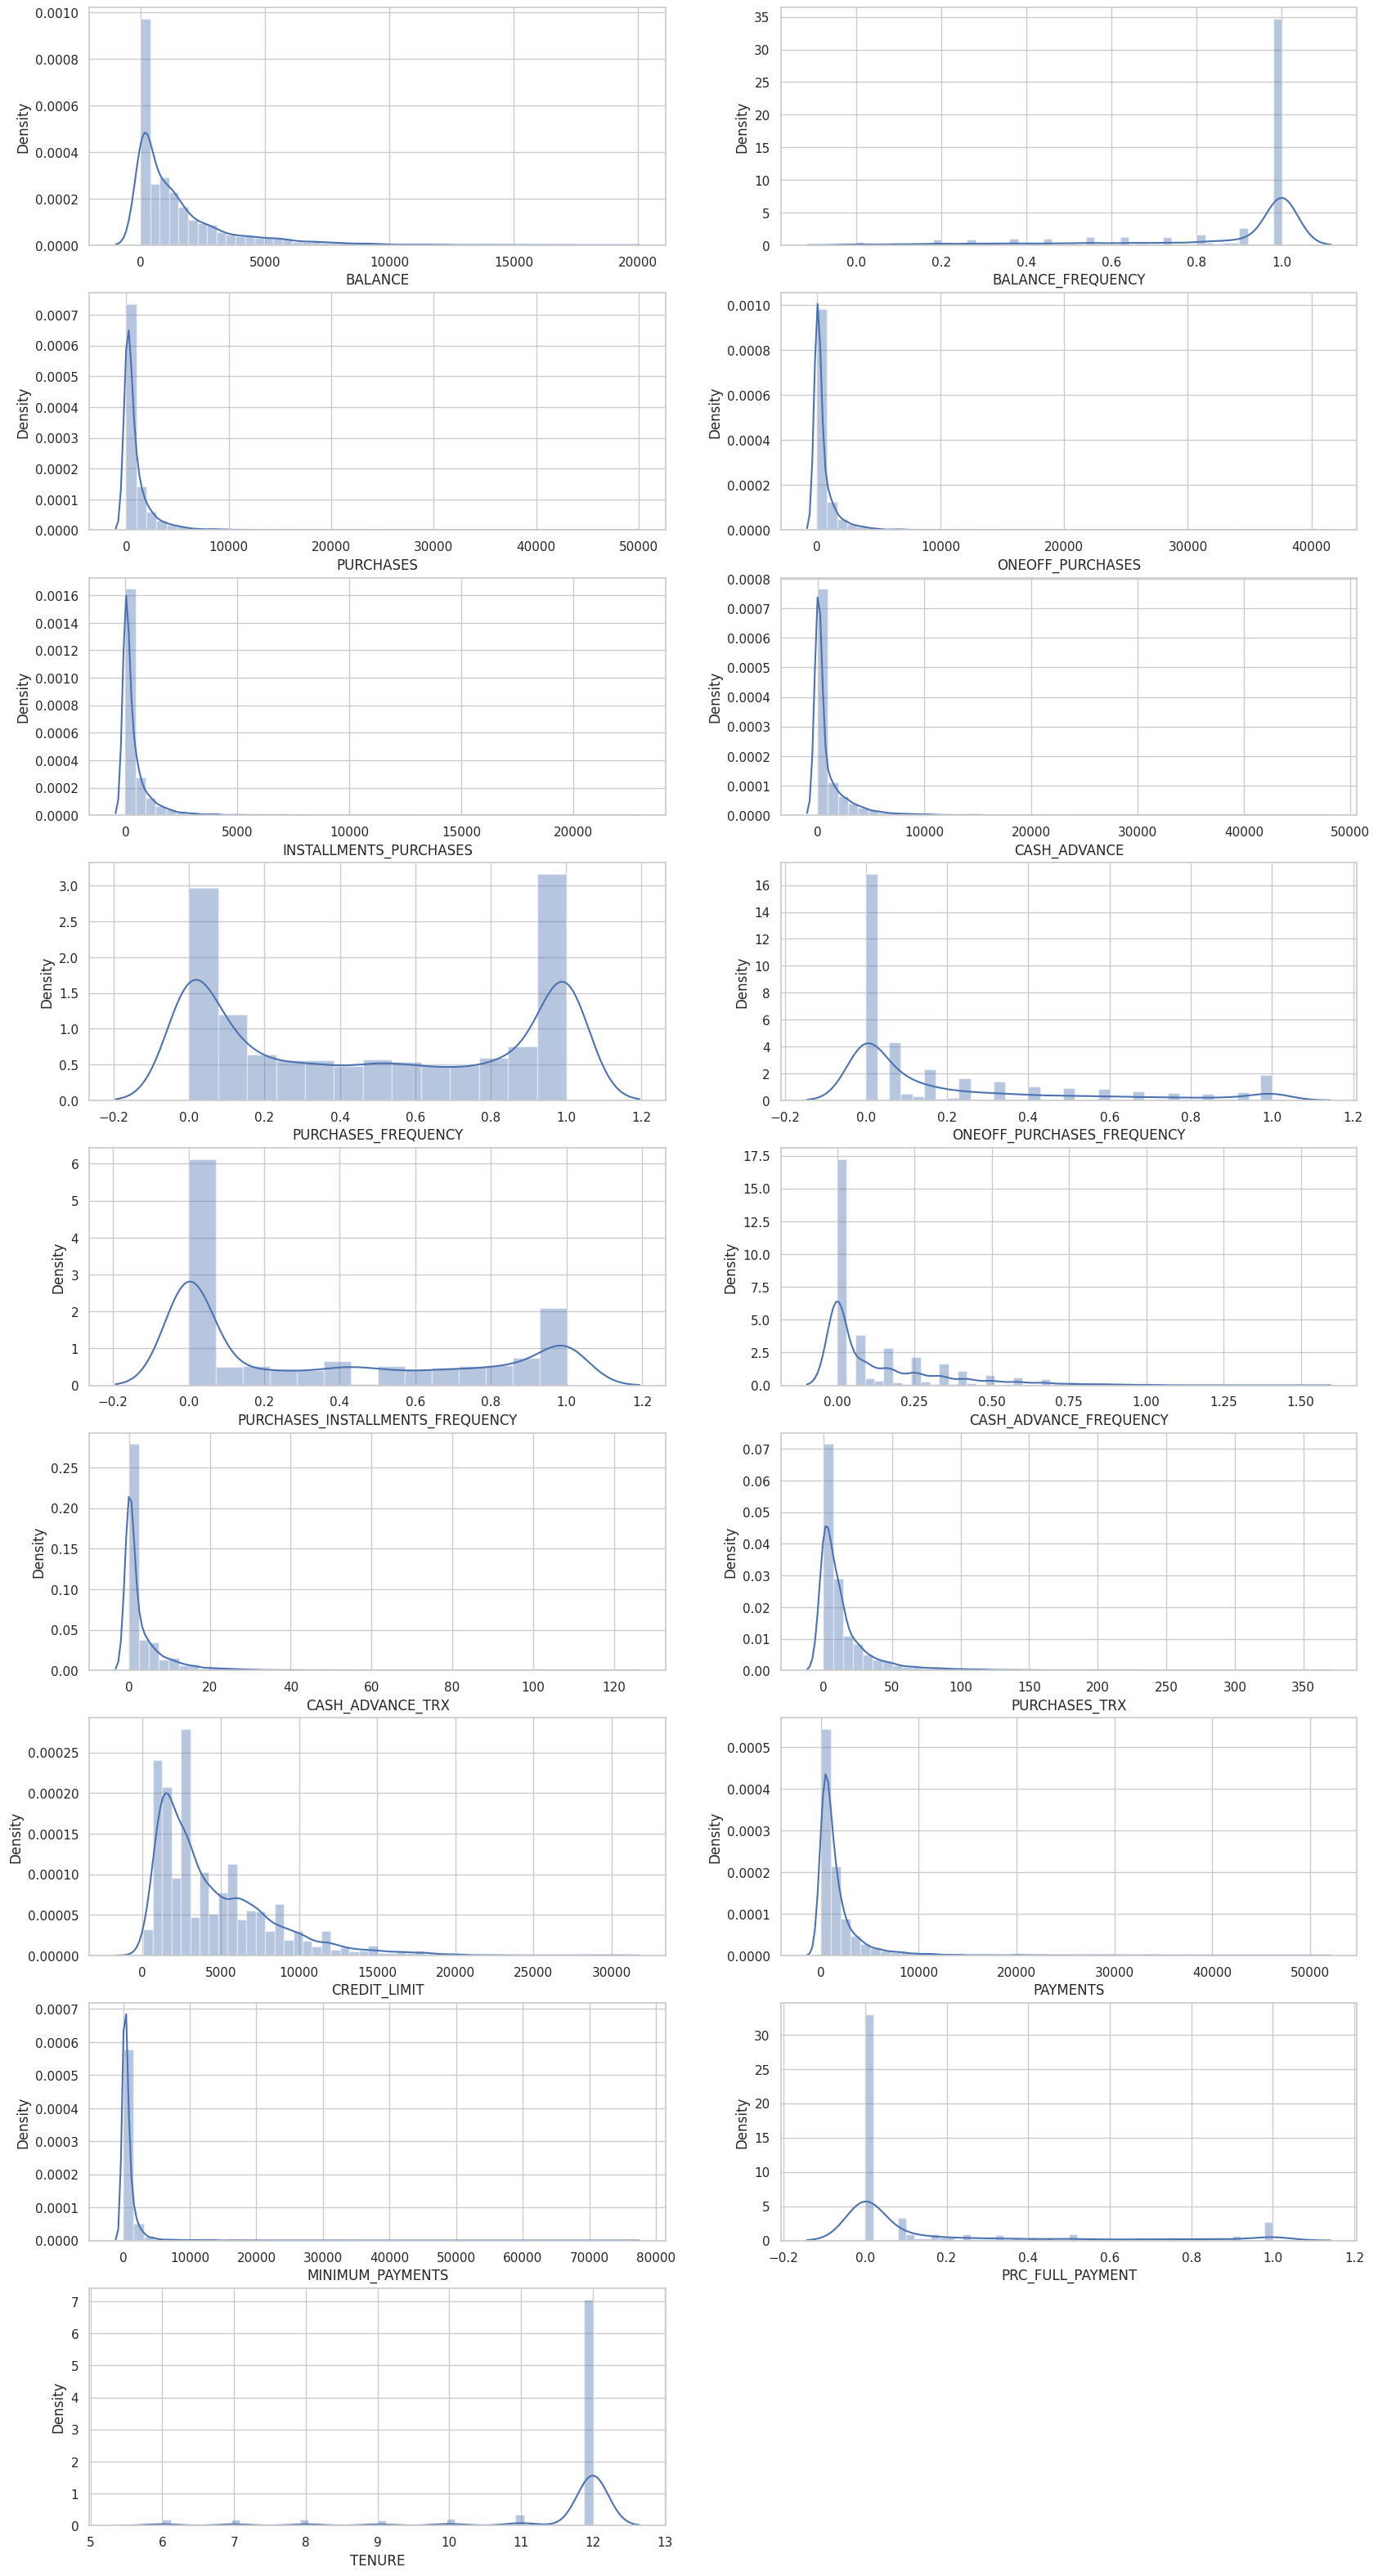

In [41]:
i=1
plt.figure(figsize= (20,40))
for col in df.columns:
    plt.subplot(9,2,i)

    sns.distplot(df[col])

    i=i+1
plt.show()


In [42]:
for col in df.columns:
    print(col)
    print({df[col].skew()})

BALANCE
{2.393270481328754}
BALANCE_FREQUENCY
{-2.0241932378008083}
PURCHASES
{8.143969328745825}
ONEOFF_PURCHASES
{10.044621791824193}
INSTALLMENTS_PURCHASES
{7.298823158100543}
CASH_ADVANCE
{5.1663234455291605}
PURCHASES_FREQUENCY
{0.0599701177816327}
ONEOFF_PURCHASES_FREQUENCY
{1.5354529638777794}
PURCHASES_INSTALLMENTS_FREQUENCY
{0.5090232211948914}
CASH_ADVANCE_FREQUENCY
{1.8286441199006067}
CASH_ADVANCE_TRX
{5.72097632533681}
PURCHASES_TRX
{4.6304932272467205}
CREDIT_LIMIT
{1.5224640052886198}
PAYMENTS
{5.90746501386916}
MINIMUM_PAYMENTS
{13.851863625728104}
PRC_FULL_PAYMENT
{1.9426413977925}
TENURE
{-2.9447877484535407}


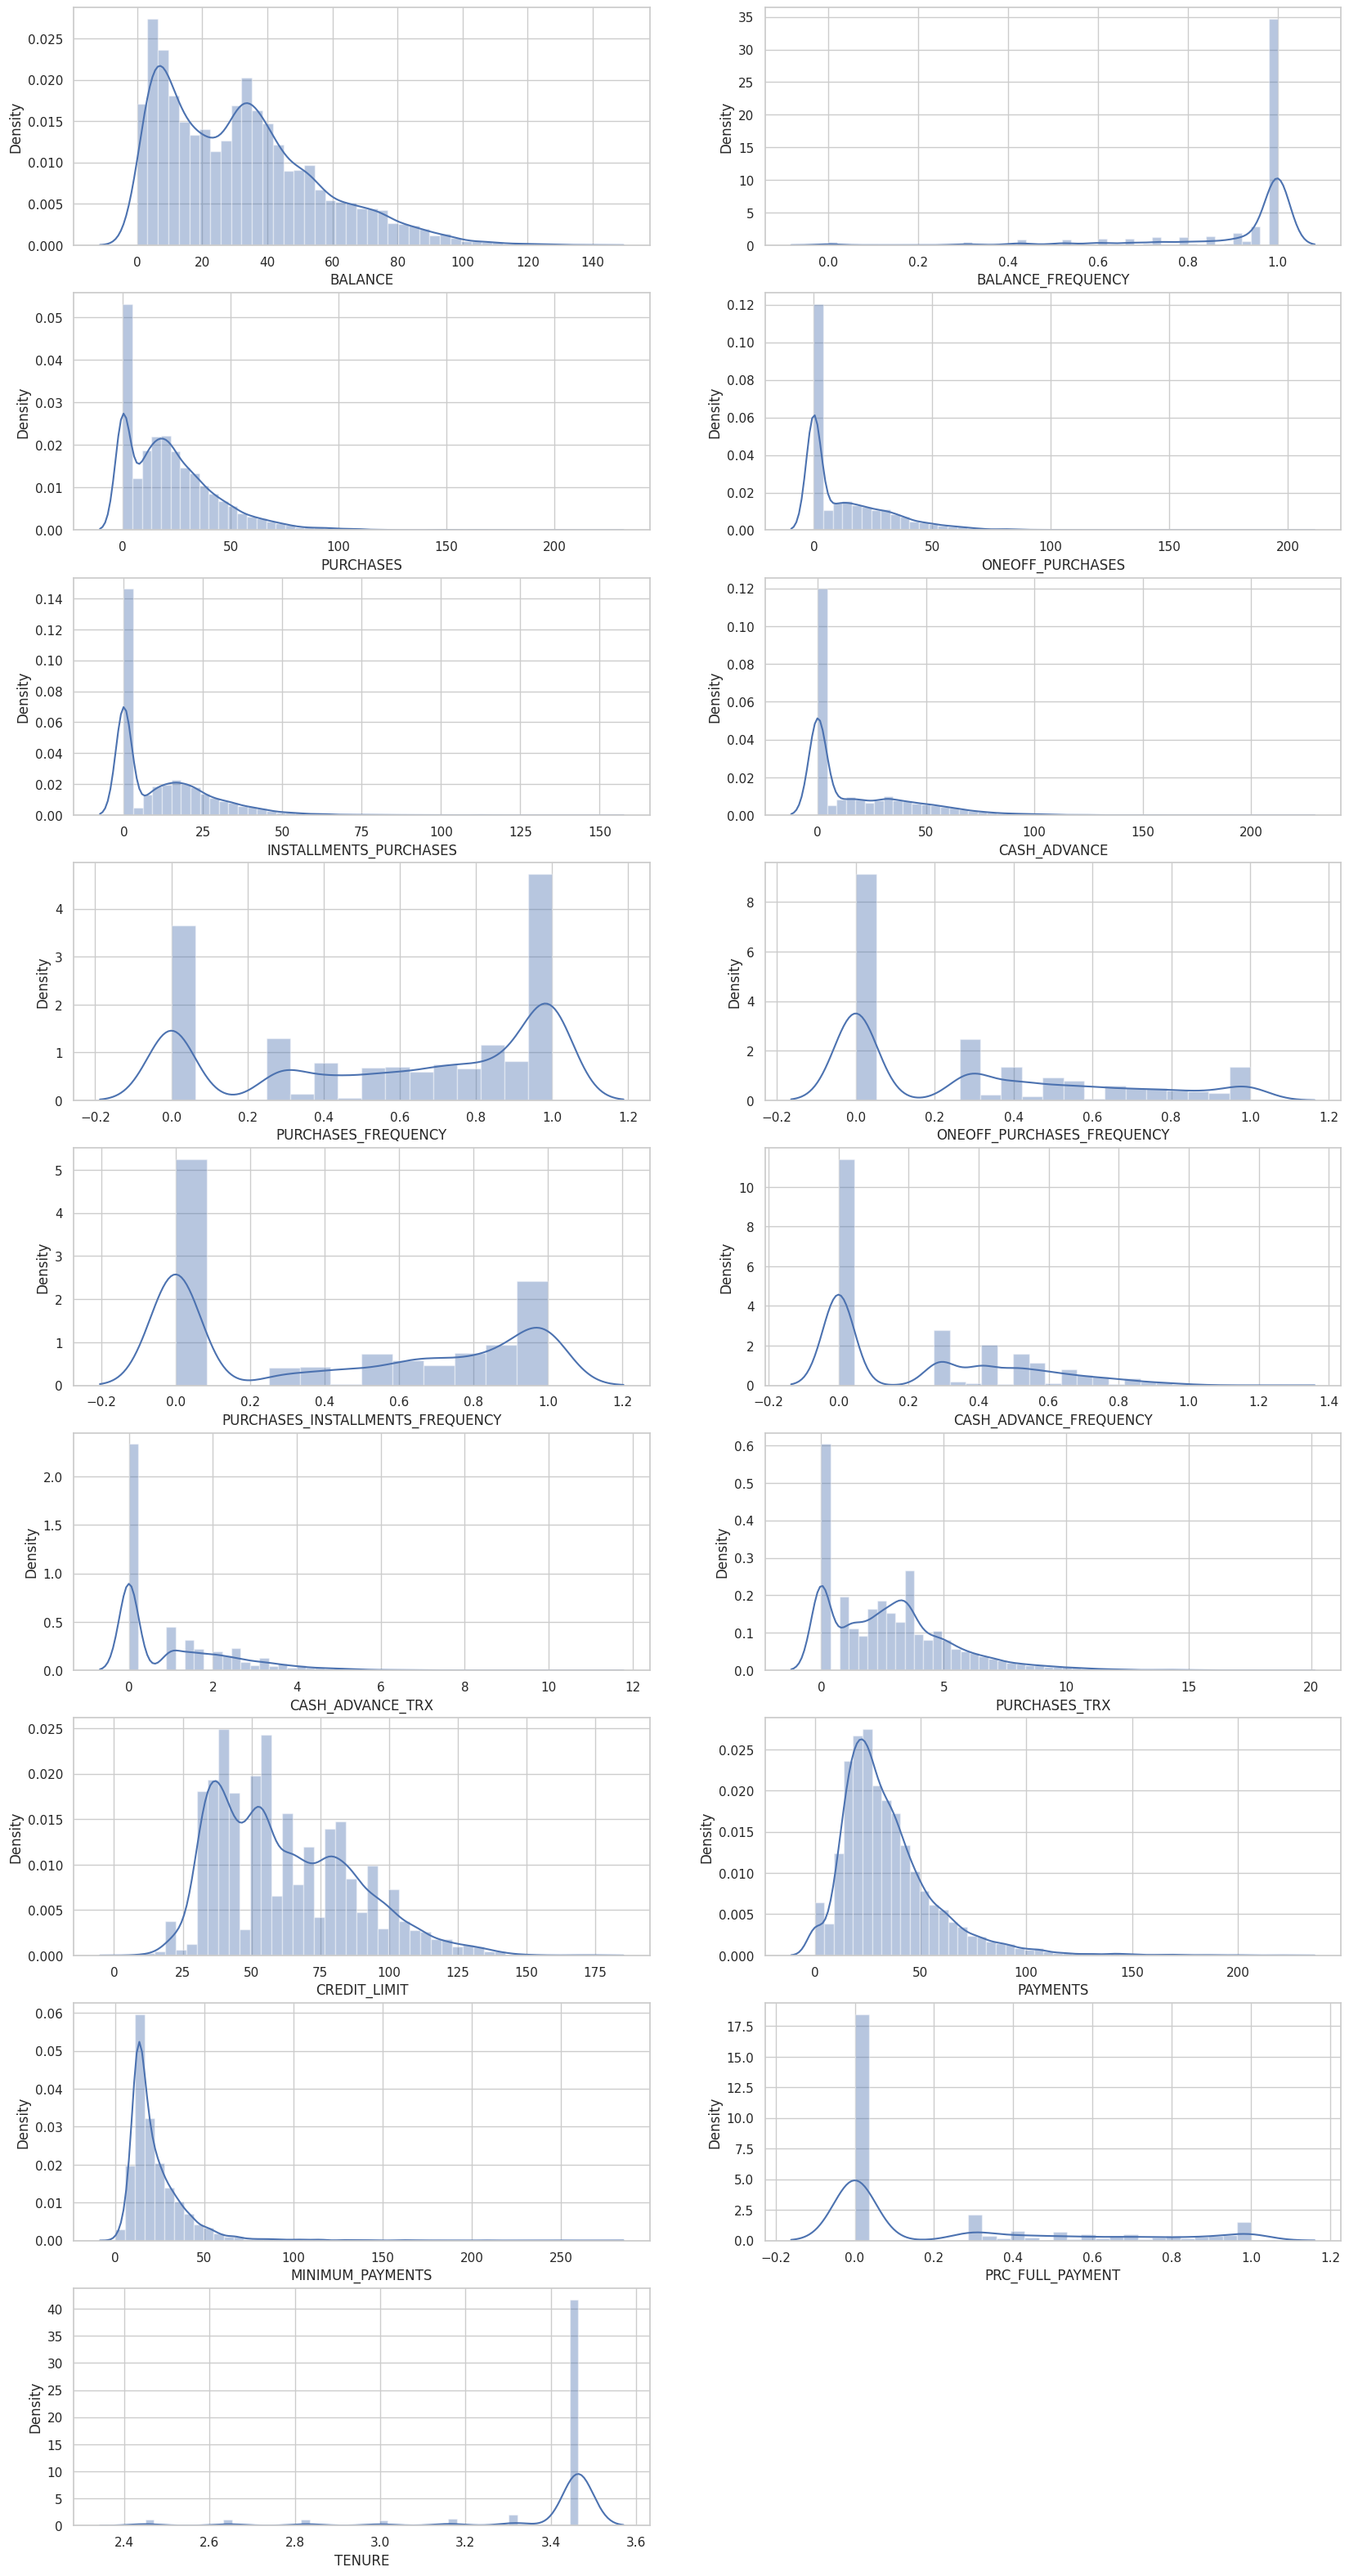

In [43]:
i=1
plt.figure(figsize=(20,40))
for col in df.columns:
    plt.subplot(9,2,i)
    df[col]= np.sqrt(df[col])
    sns.distplot(df[col])
    i=i+1

plt.show()

<Axes: >

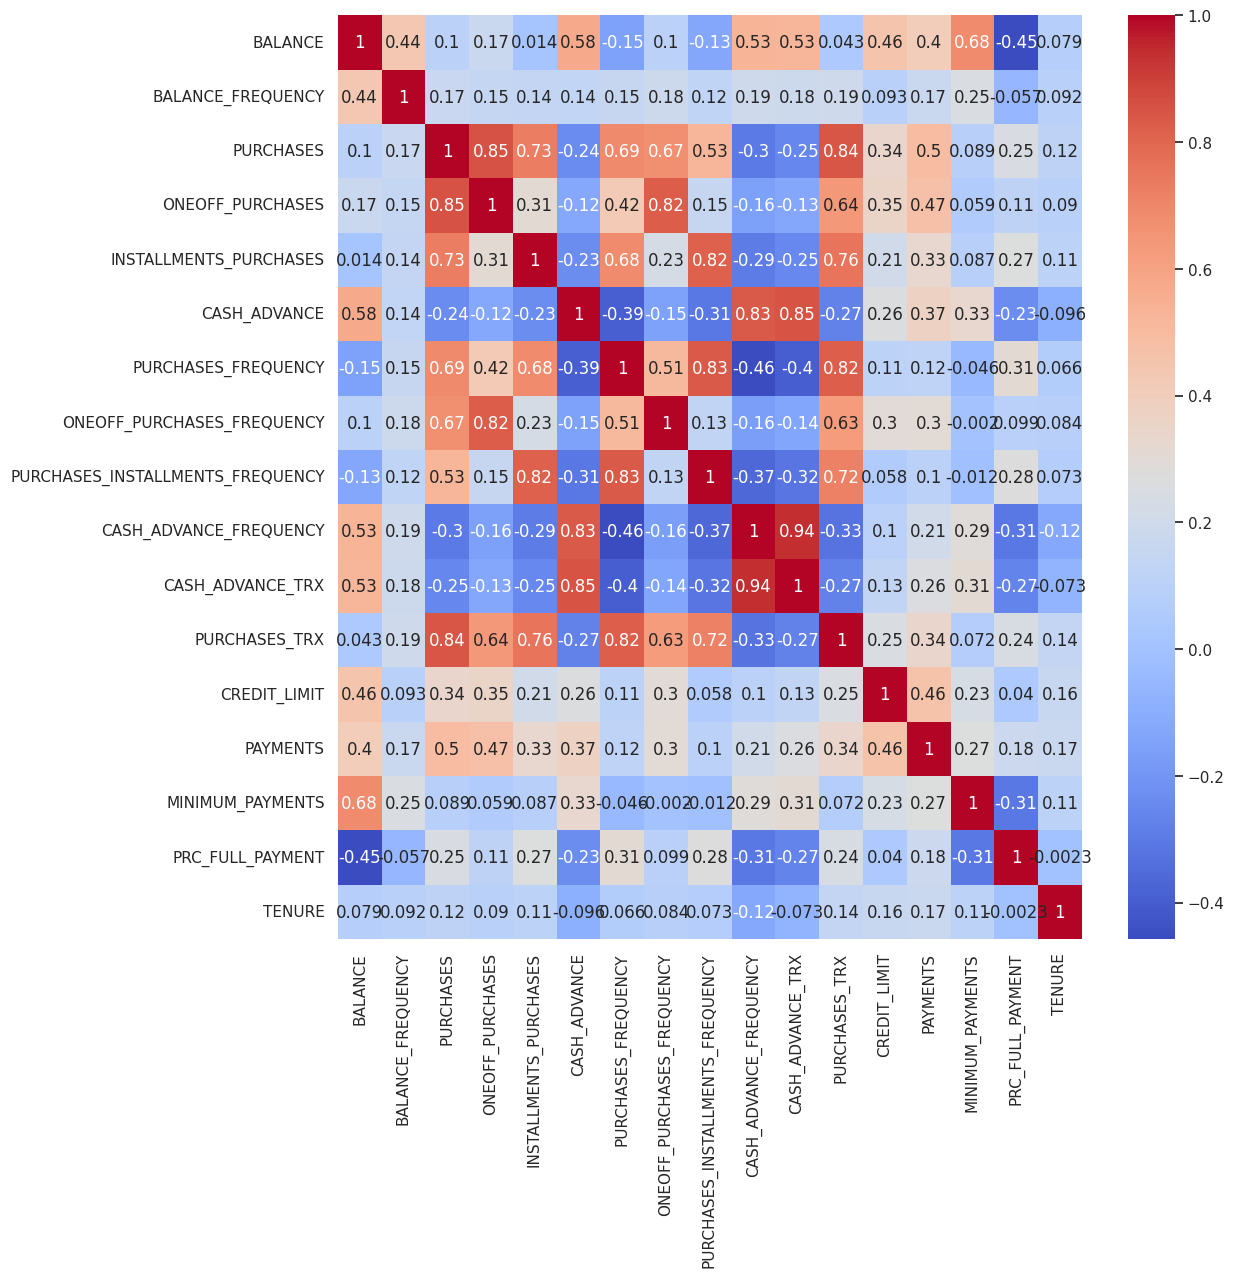

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
df= ss.fit_transform(df)

pca= PCA()
pca.fit(df)

PCA()

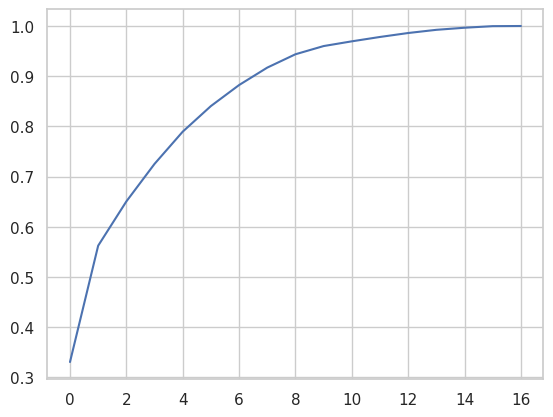

In [46]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [47]:
pca= PCA(n_components=6)
X= pca.fit_transform(df)

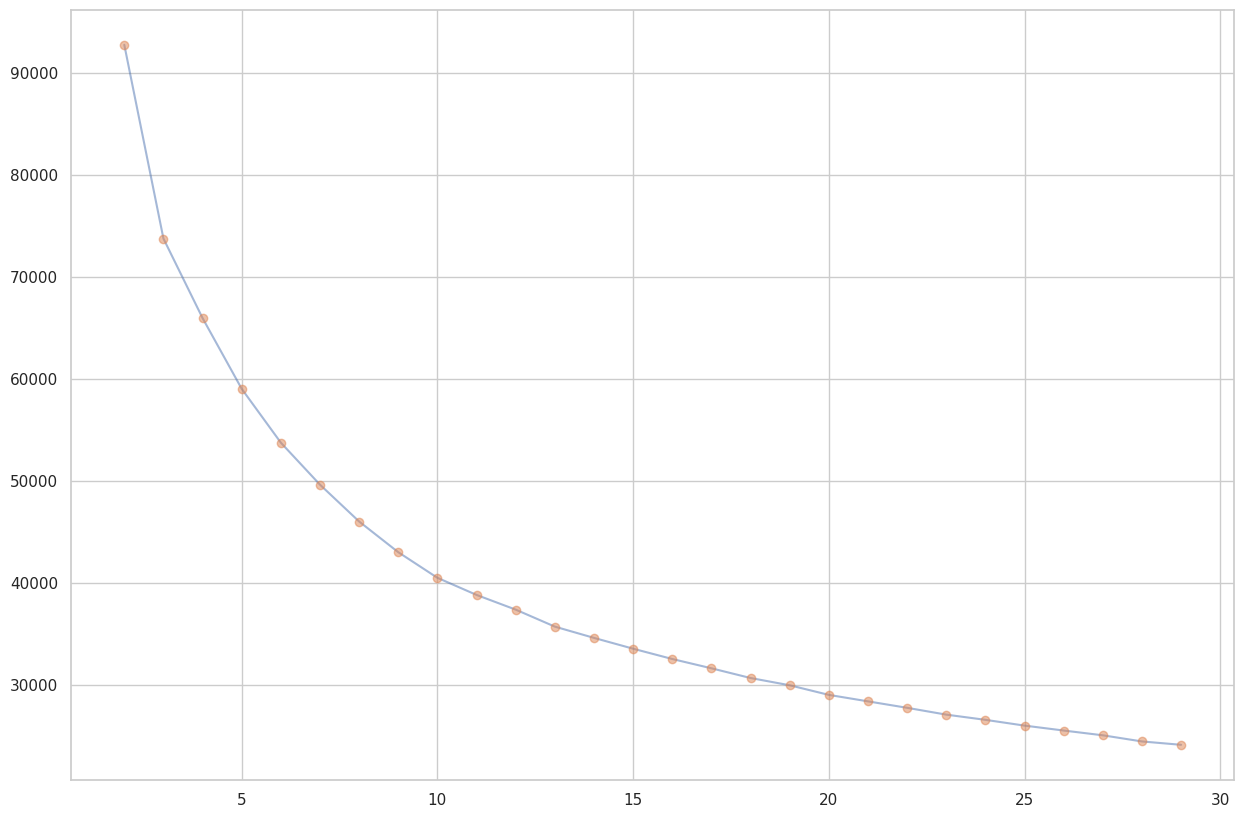

In [48]:
from sklearn.metrics import silhouette_score
plt.figure(figsize=(15,10))
distortions=[]
sil_scores=[]
for i in range(2,30):
    kmeans= KMeans(n_clusters=i, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    label= kmeans.labels_
    sil_scores.append(silhouette_score(X, label))
plt.plot(np.arange(2,30,1), distortions, alpha=0.5)
plt.plot(np.arange(2,30,1), distortions,'o' ,alpha=0.5)
plt.show()

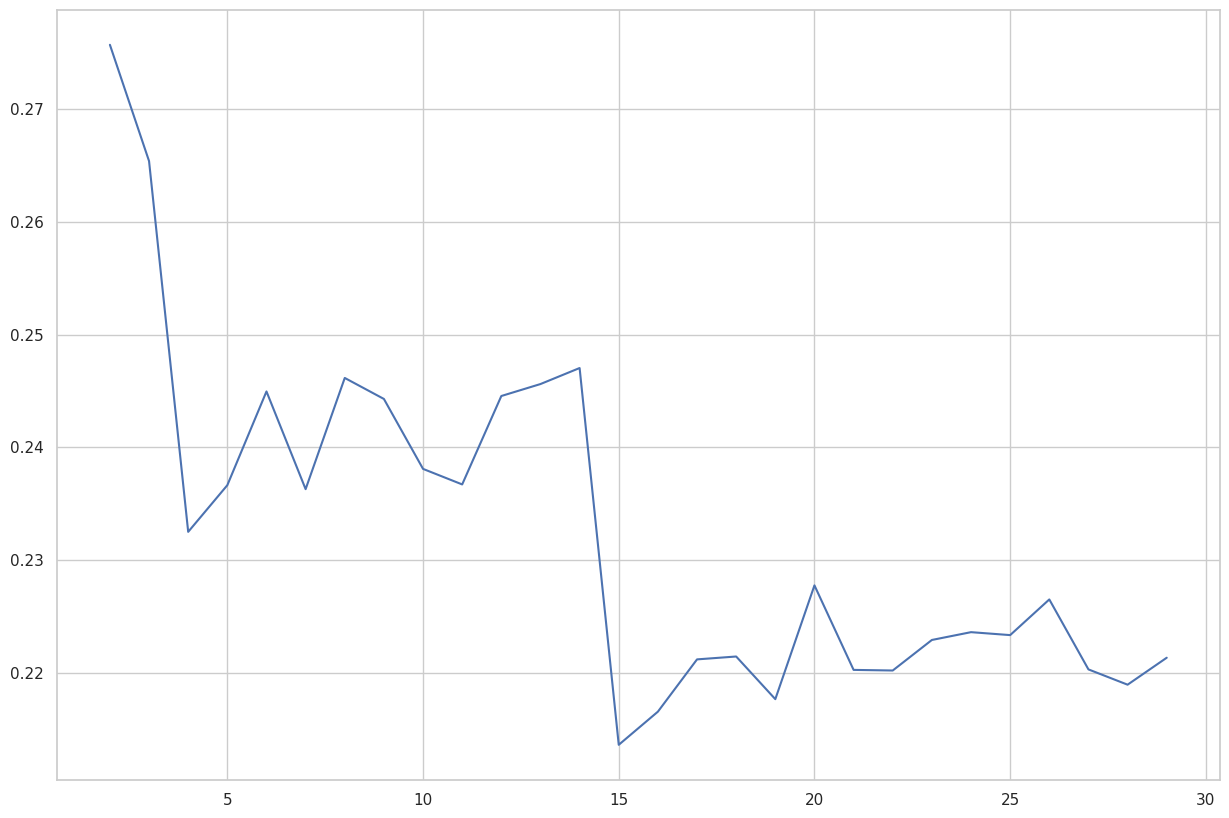

In [49]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(2,30,1), sil_scores)
plt.show()

In [50]:
kmeans= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(X)
labels= kmeans.labels_

In [51]:
pca= PCA(n_components=2)
X2= pca.fit_transform(df)

In [52]:
pca= PCA(n_components=2)
X2= pca.fit_transform(df)
pca_df = pd.DataFrame(data=X2, columns=['pca1','pca2'])
pca_df['labels']= labels
pca_df.head()

,pca1,pca2,labels
0,-0.893102,-2.470296,0
1,-2.997217,2.030084,4
2,1.191889,0.386961,0
3,-0.771674,0.015638,0
4,-1.271139,-1.578252,0


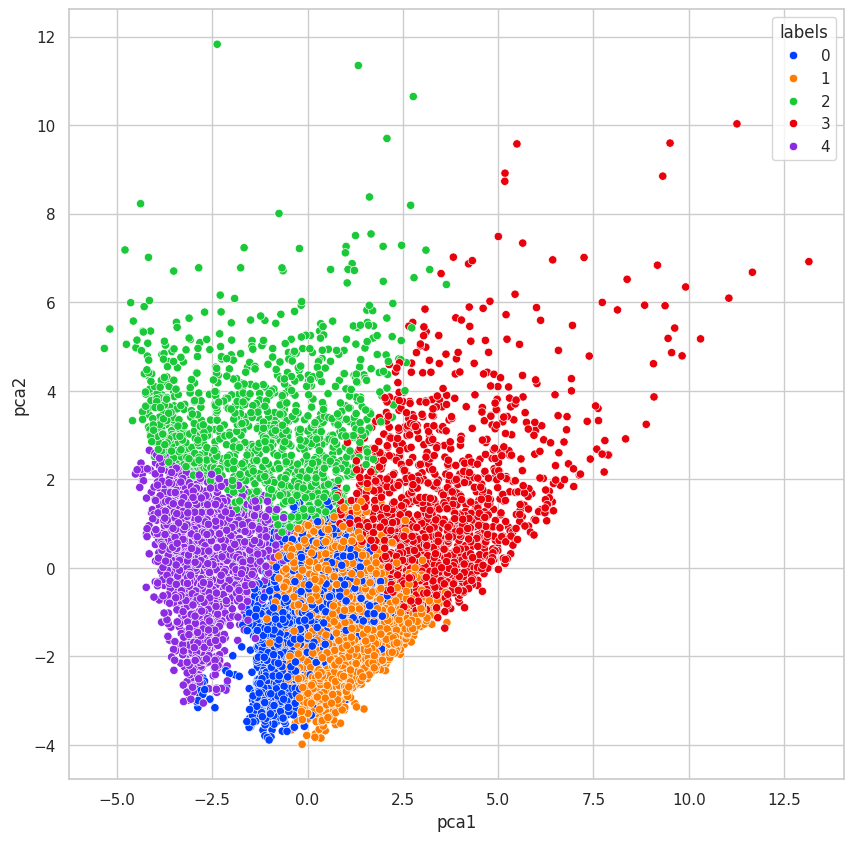

In [53]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')